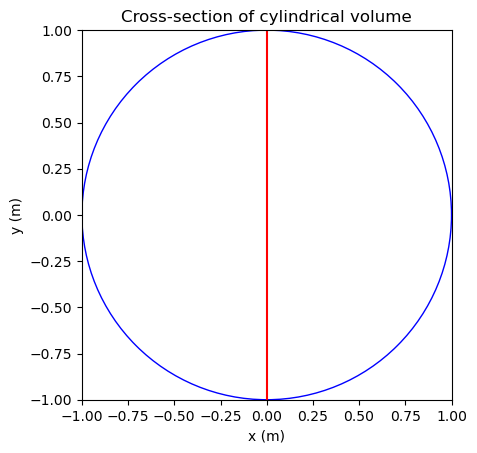

In [7]:
import matplotlib.pyplot as plt
import numpy as np

diameter = float(input("Enter the diameter of the cylindrical volume (m): "))
height = float(input("Enter the height of the cylindrical volume (m): "))

# Create a circle
r = diameter/2
circle = plt.Circle((0, 0), r, color='b', fill=False)

# Create vertical line
line = plt.Line2D([0, 0], [-height/2, height/2], color='r')

# Plot circle and line
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.add_artist(circle)
ax.add_artist(line)

# Set plot limits and labels
ax.set_xlim(-diameter/2, diameter/2)
ax.set_ylim(-height/2, height/2)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.title('Cross-section of cylindrical volume')
plt.show()


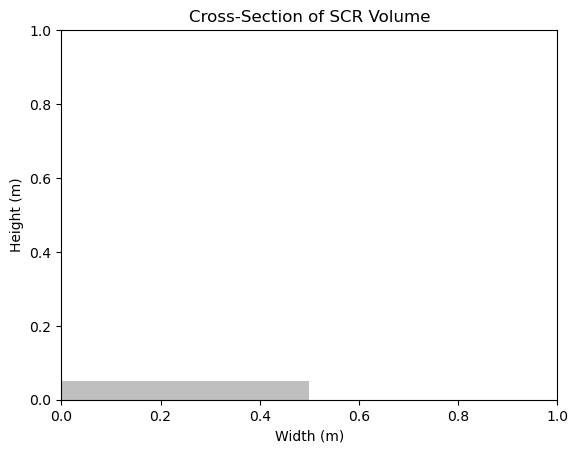

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Input constants
diameter = 0.5 # m
length = 1.0 # m
num_subvolumes = 10

# Calculations
width = diameter
height = diameter / num_subvolumes
subvolume_length = length / num_subvolumes

# Create meshgrid for plotting
x = np.linspace(0, width, 100)
y = np.linspace(0, height, 100)
X, Y = np.meshgrid(x, y)

# Create figure and axis
fig, ax = plt.subplots()

# Plot rectangle
rect = plt.Rectangle((0, 0), width, height, facecolor='gray', alpha=0.5)
ax.add_patch(rect)

# Add labels and title
plt.xlabel('Width (m)')
plt.ylabel('Height (m)')
plt.title('Cross-Section of SCR Volume')

# Show plot
plt.show()


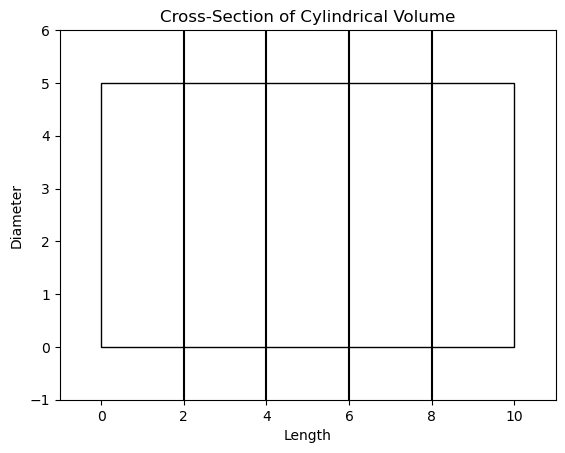

In [11]:
import matplotlib.pyplot as plt

def plot_rect(diameter, length, N):
    # Calculate width of each sub-volume
    width = length / N
    
    # Create figure and axis objects
    fig, ax = plt.subplots()
    
    # Set x and y limits to show whole rectangle
    ax.set_xlim(0, length)
    ax.set_ylim(0, diameter)
    
    # Draw outer border
    rect = plt.Rectangle((0, 0), length, diameter, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    
    # Draw vertical lines to split rectangle into sub-volumes
    for i in range(1, N):
        ax.axvline(i*width, 0, diameter, color='black')
    
    # Set axis labels and title
    ax.set_xlabel('Length')
    ax.set_ylabel('Diameter')
    ax.set_xlim(-1, length+1)
    ax.set_ylim(-1, diameter+1)
    ax.set_title('Cross-Section of Cylindrical Volume')
    
    # Show plot
    plt.show()

plot_rect(5, 10, 5)



Temperature profile of exhaust gases:
[ 700.          691.11418899  682.22837798  673.34256697  664.45675595
  655.57094494  646.68513393  637.79932292  628.91351191  620.0277009
  611.14188988  602.25607887  593.37026786  584.48445685  575.59864584
  566.71283483  557.82702382  548.9412128   540.05540179  531.16959078
  522.28377977  513.39796876  504.51215775  495.62634673  486.74053572
  477.85472471  468.9689137   460.08310269  451.19729168  442.31148066
  433.42566965  424.53985864  415.65404763  406.76823662  397.88242561
  388.9966146   380.11080358  371.22499257  362.33918156  353.45337055
  344.56755954  335.68174853  326.79593751  317.9101265   309.02431549
  300.13850448  291.25269347  282.36688246  273.48107145  264.59526043
  255.70944942  246.82363841  237.9378274   229.05201639  220.16620538
  211.28039436  202.39458335  193.50877234  184.62296133  175.73715032
  166.85133931  157.9655283   149.07971728  140.19390627  131.30809526
  122.42228425  113.53647324  104.650662

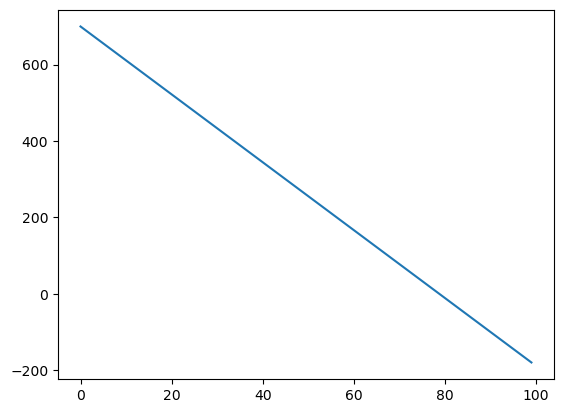

In [14]:
import numpy as np

# Input constants
exhaust_gas_constants = {
    "temperature": 700, # K
    "velocity": 20, # m/s
    "density": 1.2, # kg/m^3
    "specific_heat": 1000, # J/kg-K
    "viscosity": 1.8e-5 # kg/m-s
}

pipe_constants = {
    "inner_diameter": 0.04, # m
    "wall_thickness": 0.004, # m
    "length": 0.5, # m
    "thermal_conductivity": 60, # W/m-K
    "material": "steel"
}

air_constants = {
    "temperature": 293, # K
    "velocity": 5, # m/s
    "thermal_conductivity": 0.024, # W/m-K
    "kinematic_viscosity": 1.5e-5, # m^2/s
    "prandtl_number": 0.71
}

insulation_constants = {
    "thickness": 0.02, # m
    "thermal_conductivity": 0.05, # W/m-K
    "material": "ceramic fiber"
}

# Calculate the thermal resistance of the pipe
inner_radius = pipe_constants["inner_diameter"] / 2
outer_radius = inner_radius + pipe_constants["wall_thickness"]
inner_area = np.pi * inner_radius**2
outer_area = np.pi * outer_radius**2
length = pipe_constants["length"]
k = pipe_constants["thermal_conductivity"]
R_pipe = np.log(outer_radius/inner_radius) / (2 * np.pi * k * length)

# Calculate the thermal resistance of the insulation
thickness = insulation_constants["thickness"]
k = insulation_constants["thermal_conductivity"]
R_insulation = thickness / (2 * np.pi * k * length)

# Calculate the Reynolds number
velocity = exhaust_gas_constants["velocity"]
density = exhaust_gas_constants["density"]
viscosity = exhaust_gas_constants["viscosity"]
diameter = pipe_constants["inner_diameter"]
Re = (density * velocity * diameter) / viscosity

# Calculate the Nusselt number
Pr = air_constants["prandtl_number"]
Nu = 0.023 * Re**(4/5) * Pr**0.4

# Calculate the convective heat transfer coefficient
k = air_constants["thermal_conductivity"]
velocity = air_constants["velocity"]
h = (Nu * k) / diameter

# Calculate the heat transfer coefficient inside the pipe
velocity = exhaust_gas_constants["velocity"]
density = exhaust_gas_constants["density"]
specific_heat = exhaust_gas_constants["specific_heat"]
diameter = pipe_constants["inner_diameter"]
k = pipe_constants["thermal_conductivity"]
viscosity = exhaust_gas_constants["viscosity"]
Re = (density * velocity * diameter) / viscosity
Pr = 0.71
Nu = 0.023 * Re**(4/5) * Pr**0.3
h_pipe = (Nu * k) / diameter

# Calculate the heat transfer coefficient through the insulation
k = insulation_constants["thermal_conductivity"]
h_insulation = k / thickness

# Calculate the overall heat transfer coefficient
U = 1 / (R_pipe + R_insulation + (1/h_pipe) + (1/h_insulation) + (1/h))

# Calculate the heat transfer rate between the exhaust gases and the pipe
T_gas = exhaust_gas_constants["temperature"]
T_pipe = air_constants["temperature"]
q_conv = h * outer_area * (T_gas - T_pipe)

# Calculate the temperature profile of the exhaust gases
N = 100 # number of nodes
T = np.zeros(N)
T[0] = exhaust_gas_constants["temperature"]
for i in range(1, N):
    dTdx = q_conv / (exhaust_gas_constants["density"] * exhaust_gas_constants["velocity"] * inner_area)
    T[i] = T[i-1] - dTdx * (length / N)

# Output the results
print("Temperature profile of exhaust gases:")
print(T)
print("Total heat transfer rate:")
print(q_conv)
plt.plot(T)


Heat loss from pipe surface to surrounding air:
0.0


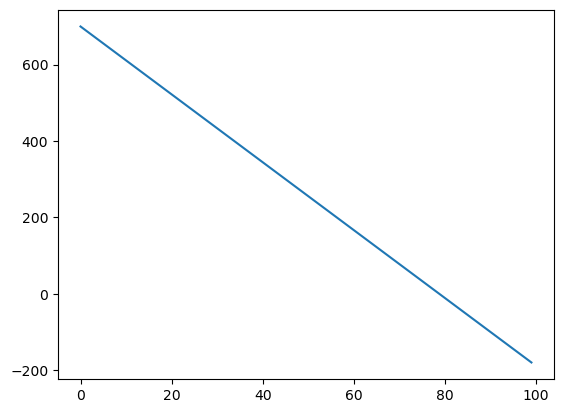

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Input constants
exhaust_gas_constants = {
    "temperature": 700, # K
    "velocity": 20, # m/s
    "density": 1.2, # kg/m^3
    "specific_heat": 1000, # J/kg-K
    "viscosity": 1.8e-5 # kg/m-s
}

pipe_constants = {
    "inner_diameter": 0.04, # m
    "wall_thickness": 0.004, # m
    "length": 0.5, # m
    "thermal_conductivity": 60, # W/m-K
    "material": "steel"
}

air_constants = {
    "temperature": 293, # K
    "velocity": 5, # m/s
    "thermal_conductivity": 0.024, # W/m-K
    "kinematic_viscosity": 1.5e-5, # m^2/s
    "prandtl_number": 0.71,
    "thickness": 1000000000
}

insulation_constants = {
    "thickness": 0.02, # m
    "thermal_conductivity": 0.05, # W/m-K
    "material": "ceramic fiber"
}

# Calculate the thermal resistance of the pipe
inner_radius = pipe_constants["inner_diameter"] / 2
outer_radius = inner_radius + pipe_constants["wall_thickness"]
inner_area = np.pi * inner_radius**2
outer_area = np.pi * outer_radius**2
length = pipe_constants["length"]
k = pipe_constants["thermal_conductivity"]
R_pipe = np.log(outer_radius/inner_radius) / (2 * np.pi * k * length)

# Calculate the thermal resistance of the insulation
thickness = insulation_constants["thickness"]
k = insulation_constants["thermal_conductivity"]
R_insulation = thickness / (2 * np.pi * k * length)

# Calculate the Reynolds number
velocity = exhaust_gas_constants["velocity"]
density = exhaust_gas_constants["density"]
viscosity = exhaust_gas_constants["viscosity"]
diameter = pipe_constants["inner_diameter"]
Re = (density * velocity * diameter) / viscosity

# Calculate the Nusselt number
Pr_air = air_constants["prandtl_number"]
Nu = 0.023 * Re**(4/5) * Pr_air**0.4

# Calculate the convective heat transfer coefficient
k_air = air_constants["thermal_conductivity"]
velocity_air = air_constants["velocity"]
h = (Nu * k_air) / diameter

# Calculate the heat transfer coefficient inside the pipe
velocity_gas = exhaust_gas_constants["velocity"]
density_gas = exhaust_gas_constants["density"]
specific_heat_gas = exhaust_gas_constants["specific_heat"]
diameter_pipe = pipe_constants["inner_diameter"]
k_pipe = pipe_constants["thermal_conductivity"]
viscosity_gas = exhaust_gas_constants["viscosity"]
Re_gas = (density_gas * velocity_gas * diameter_pipe) / viscosity_gas
Pr_gas = 0.71
Nu_gas = 0.023 * Re_gas**(4/5) * Pr_gas**0.3
h_pipe = (Nu_gas * k_pipe) / diameter_pipe

h_pipe_air = (Nu_L * air_constants["thermal_conductivity"]) / pipe_constants["inner_diameter"]
T_amb = 293 # K

# Define T_pipe before it is used in the calculation for q_rad
T_pipe = air_constants["temperature"]

q_rad = h_pipe_air * inner_area * (T_pipe - T_amb)


# Calculate the heat transfer coefficient through the insulation
k_insulation = insulation_constants["thermal_conductivity"]
h_insulation = k_insulation / insulation_constants["thickness"]

# Calculate the overall heat transfer coefficient
h_air = air_constants["velocity"] * air_constants["kinematic_viscosity"] / air_constants["thickness"]
Ra_L = (air_constants["prandtl_number"] * (air_constants["velocity"]**2) * pipe_constants["inner_diameter"]) / (air_constants["kinematic_viscosity"]**2)
Nu_L = 0.68 + ((0.67*Ra_L**(1/4)) / ((1 + (0.492/air_constants["prandtl_number"])**(9/16))**(4/9)))**(4/5)
h_pipe_air = (Nu_L * air_constants["thermal_conductivity"]) / pipe_constants["inner_diameter"]
T_amb = 293 # K
q_rad = h_pipe_air * inner_area * (T_pipe - T_amb)

U = 1 / (R_pipe + R_insulation + (1/h_pipe) + (1/h_insulation) + (1/h) + (1/h_air))


# Calculate the heat transfer rate between the exhaust gases and the pipe
T_gas = exhaust_gas_constants["temperature"]
T_pipe = air_constants["temperature"]
q_conv = h * outer_area * (T_gas - T_pipe)

# Calculate the temperature profile of the exhaust gases
N = 100 # number of nodes
T = np.zeros(N)
T[0] = exhaust_gas_constants["temperature"]
for i in range(1, N):
    dTdx = q_conv / (exhaust_gas_constants["density"] * exhaust_gas_constants["velocity"] * inner_area)
    T[i] = T[i-1] - dTdx * (length / N)

# Output the results
# print("Temperature profile of exhaust gases:")
# print(T)
# print("Total heat transfer rate:")
# print(q_conv)
plt.plot(T)

# Calculate the heat loss from the pipe surface to the surrounding air
h_air = air_constants["velocity"] * air_constants["kinematic_viscosity"] / air_constants["thickness"]
Ra_L = (air_constants["prandtl_number"] * (air_constants["velocity"]**2) * pipe_constants["inner_diameter"]) / (air_constants["kinematic_viscosity"]**2)
Nu_L = 0.68 + ((0.67*Ra_L**(1/4)) / ((1 + (0.492/air_constants["prandtl_number"])**(9/16))**(4/9)))**(4/5)
h_pipe_air = (Nu_L * air_constants["thermal_conductivity"]) / pipe_constants["inner_diameter"]
T_amb = 293 # K
q_rad = h_pipe_air * inner_area * (T_pipe - T_amb)
print("Heat loss from pipe surface to surrounding air:")
print(q_rad)